In [3]:
import sys
sys.path.append('old-analysis')

import generaluse as gu
import resultsmanaging as rm
import pandas as pd
import cv2

%load_ext autoreload
%autoreload 2

In [19]:
folder_name = 'preprodata'

dictionary = gu.getImgNamesAndPaths(folder_name)

list_filenames = list(dictionary.keys())
list_filepaths = [*dictionary.values()]

list_data = []
for name, path in zip(list_filenames,list_filepaths):
    data = dict()
    data["Filename"] = name
    data["Filepath"] = path
    list_data.append(data)

dataframe = pd.DataFrame(data=list_data)
dataframe

Filename                   Filepath
0  pp-frb-001.jpg  preprodata/pp-frb-001.jpg
1  pp-frb-002.jpg  preprodata/pp-frb-002.jpg
2  pp-frb-003.jpg  preprodata/pp-frb-003.jpg
3  pp-frb-004.jpg  preprodata/pp-frb-004.jpg
4  pp-frb-005.jpg  preprodata/pp-frb-005.jpg

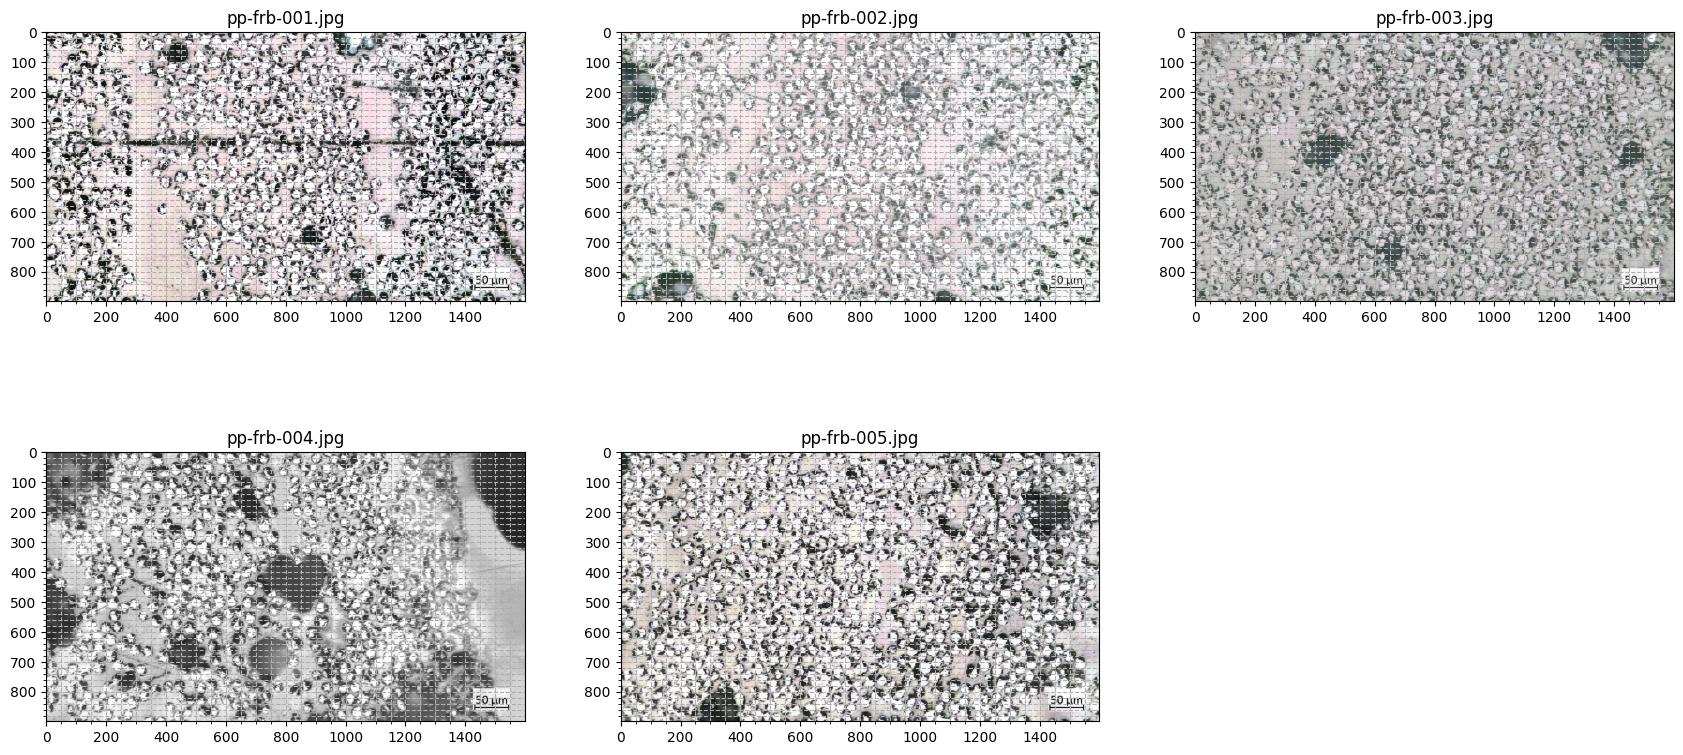

In [20]:
list_imgs = gu.getImagesFromPathfile(list_filepaths)
gu.plotFigures(list_filenames,list_imgs)

In [21]:
list_bubbles_coordinates = [
    [(80,420),(660,860),(880,1080)],
    [(200,80),(810,200),(200,950),(880,1080)],
    [(400,410),(750,650),(400,1450),(50,1480)],
    [(50,100),(550,70),(770,260),(680,480),(200,700),(400,800),(700,720),(870,1270),(100,1520)],
    [(50,10),(870,300),(200,1420)]
]

dataframe["BubbleCoor"] = list_bubbles_coordinates
dataframe

Filename                   Filepath  \
0  pp-frb-001.jpg  preprodata/pp-frb-001.jpg   
1  pp-frb-002.jpg  preprodata/pp-frb-002.jpg   
2  pp-frb-003.jpg  preprodata/pp-frb-003.jpg   
3  pp-frb-004.jpg  preprodata/pp-frb-004.jpg   
4  pp-frb-005.jpg  preprodata/pp-frb-005.jpg   

                                          BubbleCoor  
0               [(80, 420), (660, 860), (880, 1080)]  
1   [(200, 80), (810, 200), (200, 950), (880, 1080)]  
2  [(400, 410), (750, 650), (400, 1450), (50, 1480)]  
3  [(50, 100), (550, 70), (770, 260), (680, 480),...  
4                [(50, 10), (870, 300), (200, 1420)]

In [22]:
list_imgs

[array([[[ 28,  24,  23],
         [ 31,  27,  26],
         [ 18,  14,  15],
         ...,
         [233, 233, 223],
         [229, 231, 217],
         [231, 235, 218]],
 
        [[ 31,  27,  26],
         [ 34,  30,  29],
         [ 23,  19,  20],
         ...,
         [230, 231, 223],
         [226, 230, 216],
         [228, 232, 217]],
 
        [[ 34,  28,  28],
         [ 37,  31,  31],
         [ 27,  21,  23],
         ...,
         [226, 229, 222],
         [220, 228, 217],
         [220, 228, 215]],
 
        ...,
 
        [[237, 219, 231],
         [235, 217, 229],
         [231, 213, 225],
         ...,
         [252, 242, 250],
         [249, 247, 250],
         [241, 247, 245]],
 
        [[225, 203, 224],
         [222, 201, 220],
         [218, 197, 212],
         ...,
         [253, 241, 251],
         [251, 246, 250],
         [241, 247, 247]],
 
        [[223, 201, 222],
         [221, 200, 219],
         [217, 196, 211],
         ...,
         [253, 241, 251],
  

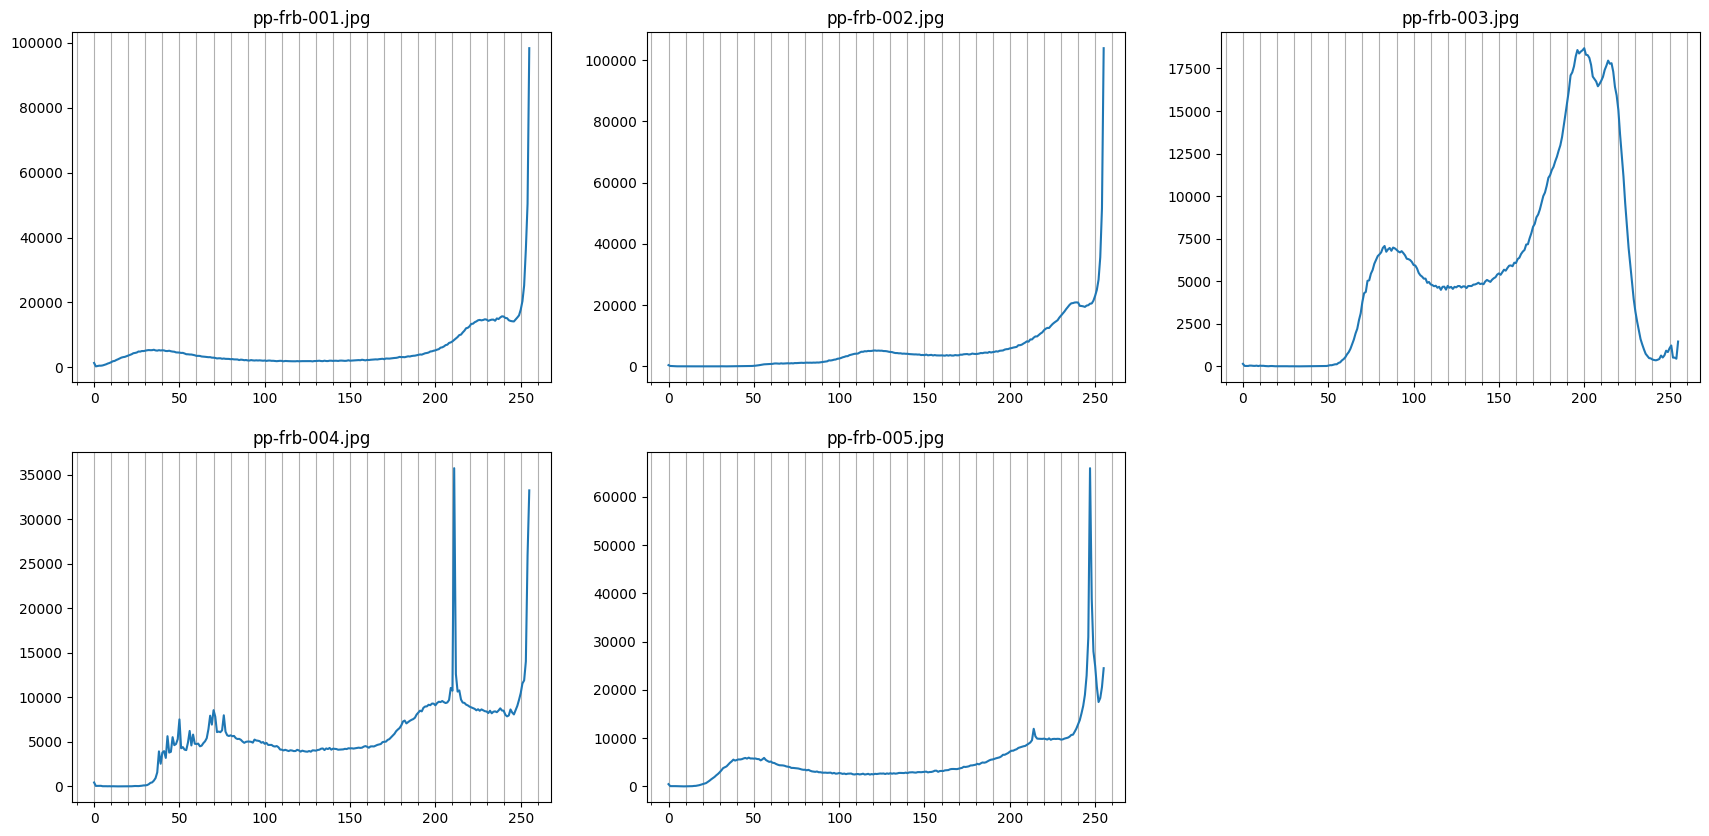

In [23]:
list_hist = []
for img in list_imgs:
    # Utilizo la capa verde porque es la que ofrece más gama de grises
    img_gch = img[:,:,1]
    
    hist = cv2.calcHist([img_gch], [0], None, [256], [0, 256])
    list_hist.append(hist)

gu.plotHist(list_filenames,list_hist)

In [24]:
list_graylevel_boundaries = [
    [120,250],
    [150,250],
    [120,210],
    [120,240],
    [100,245]
]

dataframe["GLBoundaries"] = list_graylevel_boundaries

dataframe

Filename                   Filepath  \
0  pp-frb-001.jpg  preprodata/pp-frb-001.jpg   
1  pp-frb-002.jpg  preprodata/pp-frb-002.jpg   
2  pp-frb-003.jpg  preprodata/pp-frb-003.jpg   
3  pp-frb-004.jpg  preprodata/pp-frb-004.jpg   
4  pp-frb-005.jpg  preprodata/pp-frb-005.jpg   

                                          BubbleCoor GLBoundaries  
0               [(80, 420), (660, 860), (880, 1080)]   [120, 250]  
1   [(200, 80), (810, 200), (200, 950), (880, 1080)]   [150, 250]  
2  [(400, 410), (750, 650), (400, 1450), (50, 1480)]   [120, 210]  
3  [(50, 100), (550, 70), (770, 260), (680, 480),...   [120, 240]  
4                [(50, 10), (870, 300), (200, 1420)]   [100, 245]

In [29]:
list_results = []
list_results = rm.showResults(list_imgs,list_filenames,list_graylevel_boundaries,list_bubbles_coordinates)

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

# 2do

In [4]:
folder_name = 'rawdata'

dictionary = gu.getImgNamesAndPaths(folder_name)

list_filenames = list(dictionary.keys())
list_filepaths = [*dictionary.values()]

list_data = []
for name, path in zip(list_filenames,list_filepaths):
    data = dict()
    data["Filename"] = name
    data["Filepath"] = path
    list_data.append(data)

dataframe = pd.DataFrame(data=list_data)
dataframe

Filename             Filepath
0  frb-001.jpg  rawdata/frb-001.jpg
1  frb-002.jpg  rawdata/frb-002.jpg
2  frb-003.jpg  rawdata/frb-003.jpg
3  frb-004.jpg  rawdata/frb-004.jpg
4  frb-005.jpg  rawdata/frb-005.jpg

In [5]:
list_imgs = gu.getImagesFromPathfile(list_filepaths,cv2.COLOR_BGR2GRAY)
list_imgs

[array([[114, 115, 100, ..., 221, 219, 217],
        [113, 114, 100, ..., 219, 217, 215],
        [116, 117, 103, ..., 216, 214, 213],
        ...,
        [225, 223, 221, ..., 233, 227, 229],
        [220, 218, 216, ..., 233, 226, 228],
        [216, 215, 213, ..., 233, 226, 228]],
       shape=(899, 1599), dtype=uint8),
 array([[229, 228, 227, ..., 220, 217, 191],
        [224, 224, 224, ..., 219, 215, 195],
        [221, 222, 223, ..., 217, 213, 198],
        ...,
        [213, 215, 216, ..., 189, 189, 186],
        [211, 213, 214, ..., 177, 177, 174],
        [207, 210, 212, ..., 165, 166, 164]],
       shape=(899, 1599), dtype=uint8),
 array([[ 78,  83,  96, ..., 189, 187, 186],
        [ 75,  76,  85, ..., 188, 187, 186],
        [ 71,  69,  76, ..., 190, 189, 189],
        ...,
        [165, 144, 132, ..., 109, 111, 108],
        [137, 119, 115, ..., 110, 112, 110],
        [112,  98, 101, ..., 111, 114, 114]],
       shape=(899, 1599), dtype=uint8),
 array([[162, 164, 164, ...,

In [6]:
global_parameters = [

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 60,
    'cont_mult': 2.5,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 80,
    'cont_mult': 2,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 2,
    'bhm_mult': 60,
    'cont_mult': 1,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 60,
    'cont_mult': 2.5,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 60,
    'cont_mult': 2.5,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
}
]

In [8]:
import getmeresults as gmr
list_percentages = []
list_segmentations = []
list_colorings = []

# for i in range(len(list_imgs)):
i = 0
parameters = global_parameters[i]
percentages, segmentation, coloring = gmr.getMeResults(list_imgs[i], parameters=parameters)
list_percentages.append(percentages)
list_segmentations.append(segmentation)
list_colorings.append(coloring)

In [9]:
list_percentages

[{'pores': np.float64(6.2375608782185195),
  'fibers': np.float64(42.24233583141855),
  'resin': np.float64(43.21283950411165),
  'undefined': np.float64(8.307263786251278),
  'sumcheck': np.float64(100.0)}]

In [10]:
list_segmentations

[array([[ 60,  60,  60, ..., 150, 150, 150],
        [ 60,  60,  60, ..., 150, 150, 150],
        [ 60,  60,  60, ..., 150, 150, 150],
        ...,
        [150, 150, 150, ..., 250, 250, 250],
        [150, 150, 150, ..., 250, 250, 250],
        [150, 150, 150, ..., 250, 250, 250]],
       shape=(899, 1599), dtype=uint8)]

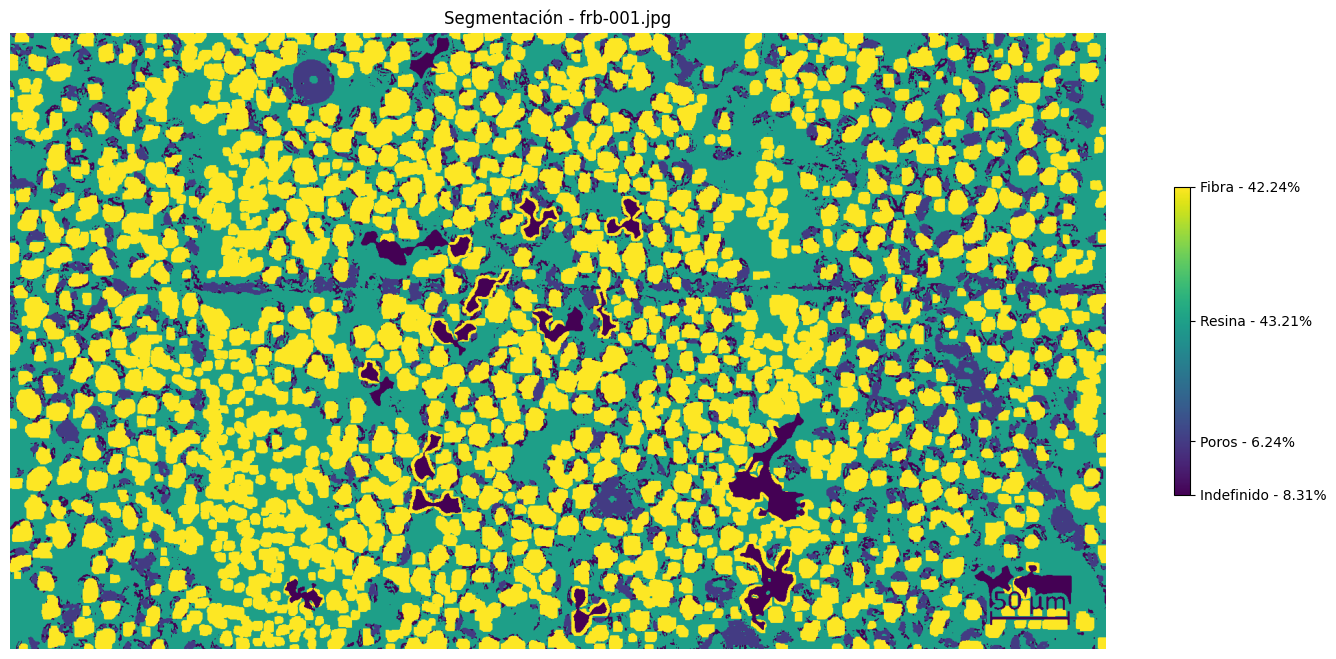

In [11]:
import matplotlib.pyplot as plt
def getSegmentationFigure(segmentation, percentages, filename):
    fig = plt.figure(figsize=(14, 8))
    plt.imshow(segmentation)
    plt.axis('off')

    # Agregar la barra de color con etiquetas personalizadas
    cbar = plt.colorbar(orientation="vertical",shrink=0.4)
    cbar.set_ticks([20,60,150,250])
    cbar.set_ticklabels([
        f"Indefinido - {percentages['undefined']:.2f}%",
        f"Poros - {percentages['pores']:.2f}%",
        f"Resina - {percentages['resin']:.2f}%",
        f"Fibra - {percentages['fibers']:.2f}%"
        ])
    plt.title(f"Segmentación - {filename}")
    plt.tight_layout()
getSegmentationFigure(list_segmentations[0], list_percentages[0], list_filenames[0])

In [15]:
coloring

array([[[116,   0,   0],
        [126,   0,   0],
        [232,   0,   0],
        ...,
        [  0, 221,   0],
        [  0, 219,   0],
        [  0, 217,   0]],

       [[106,   0,   0],
        [116,   0,   0],
        [232,   0,   0],
        ...,
        [  0, 219,   0],
        [  0, 217,   0],
        [  0, 215,   0]],

       [[136,   0,   0],
        [146,   0,   0],
        [  6,   0,   0],
        ...,
        [  0, 216,   0],
        [  0, 214,   0],
        [  0, 213,   0]],

       ...,

       [[  0, 225,   0],
        [  0, 223,   0],
        [  0, 221,   0],
        ...,
        [233, 233,   0],
        [227, 227,   0],
        [229, 229,   0]],

       [[  0, 220,   0],
        [  0, 218,   0],
        [  0, 216,   0],
        ...,
        [233, 233,   0],
        [226, 226,   0],
        [228, 228,   0]],

       [[  0, 216,   0],
        [  0, 215,   0],
        [  0, 213,   0],
        ...,
        [233, 233,   0],
        [226, 226,   0],
        [228, 228,   0]]

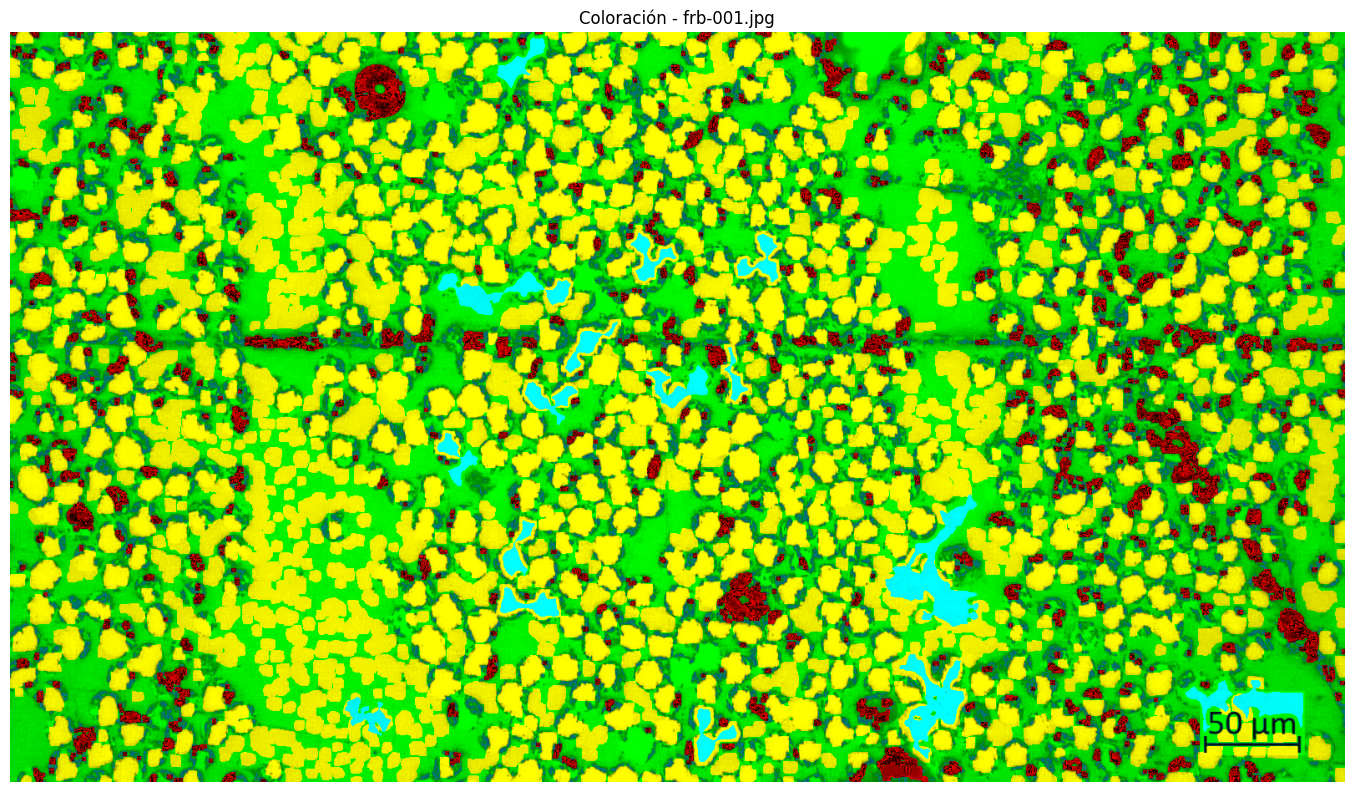

In [16]:
def getColoringFigure(coloring, filename):
    fig = plt.figure(figsize=(14, 8))
    plt.imshow(coloring,vmin=0,vmax=255)
    plt.axis('off')
    plt.title(f"Coloración - {filename}")
    plt.tight_layout()
getColoringFigure(list_colorings[0], list_filenames[0])